# TP Lecture 3: Introduction to Image Processing Techniques and Image restoration 

We will cover the following topics in this tutorial:
- Image visualization and histogram visualization
- Histogram matching and equalization
- Denoising
- Spatial Filtering



## First create your new virtual environment 
Es we learned in the previous session. 

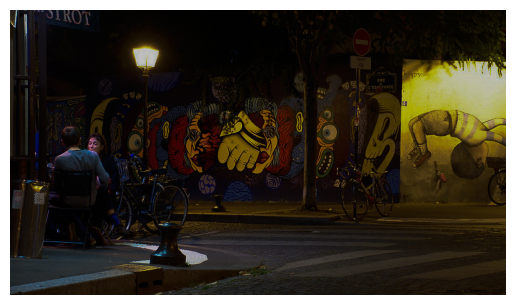

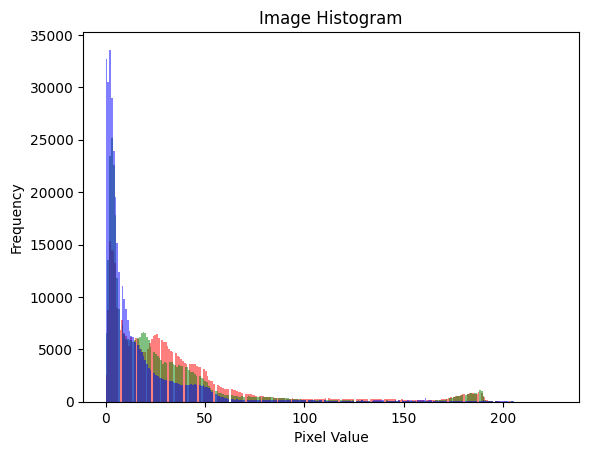

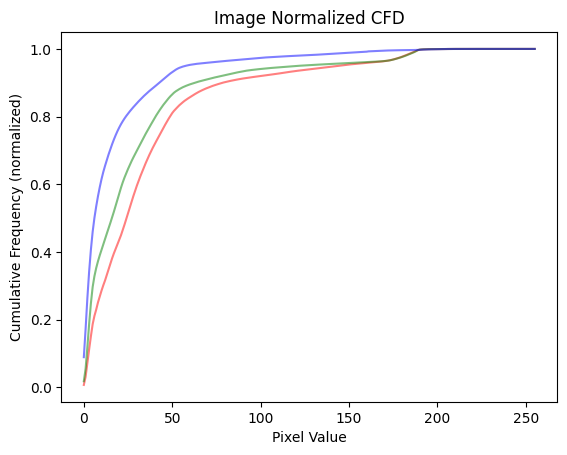

In [67]:
import matplotlib.pyplot as plt
import cv2

# Read the test image
image = cv2.imread("data/test1.jpg")

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualize the image
plt.imshow(image)
plt.axis("off")
plt.show()


# ---------------------------------------- #
# Ex1 (a): Plot the image histogram
# define a function: plot_image_histogram(image)
# which will be used in the next exercises
def plot_image_histogram(image):
    #TODO
# ---------------------------------------- #
plot_image_histogram(image)


# ---------------------------------------- #
# Ex1 (b): Plot the image normalized cumulated histogram
# define a function: plot_image_cfd(image)
# which will be used in the next exercises
def plot_image_cfd(image):
    #TODO
# ---------------------------------------- #

plot_image_cfd(image), plt.title("Image Normalized CFD")

## Let's fix the image dynamic range by performing histogram equalization

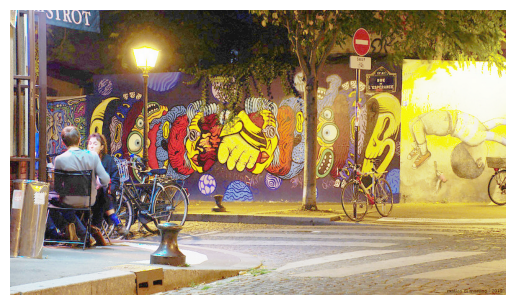

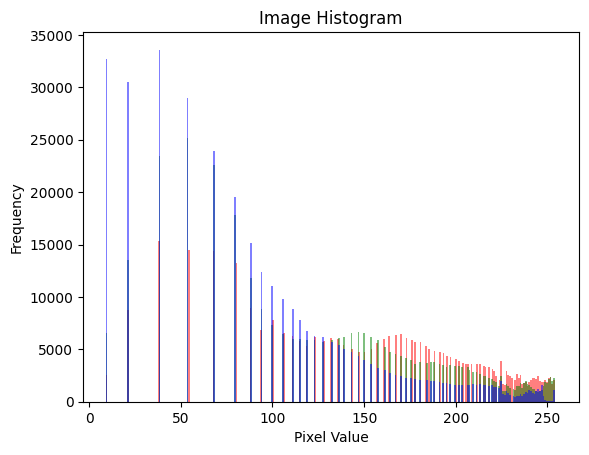

In [68]:
import numpy as np


# ---------------------------------------- #
# Ex 2: Implement image equalization (only using numpy)
# define a method called histogram_equalization(image)
def histogram_equalization(image):
    #TODO
# ---------------------------------------- #

# Apply histogram equalization to the image
equalized_image = histogram_equalization(image)

# Visualize the equalized image
plt.imshow(equalized_image)
plt.axis("off")
plt.show()
plot_image_histogram(equalized_image)

### Let's compare the cumulative distribution of these two images

Ex 3: Explain

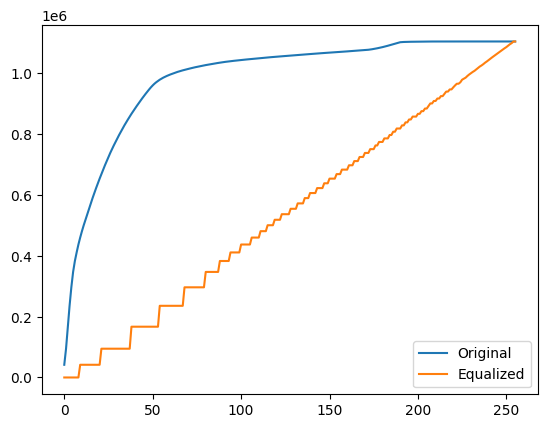

In [69]:
plt.plot(np.cumsum(np.histogram(image.ravel(), bins=256, range=[0, 256])[0]))
plt.plot(np.cumsum(np.histogram(equalized_image.ravel(), bins=256, range=[0, 256])[0]))
plt.legend(["Original", "Equalized"])

## Histogram matching

We will match the histogram of one image into another. 

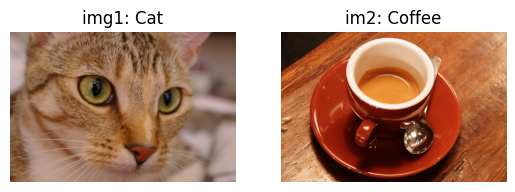

In [70]:
# We will get to test images from skimage library
from skimage import data

img1 = getattr(data, "cat")()
img2 = getattr(data, "coffee")()
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis("off"), plt.title("img1: Cat")
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis("off"), plt.title("im2: Coffee")

In [71]:
import numpy as np
# ---------------------------------------- #
# Ex 3: Implement histogram matching (only using numpy)
# define a method called histogram_matching(image, target_image)
def histogram_matching(image, target_image):
    #TODO
# ---------------------------------------- #

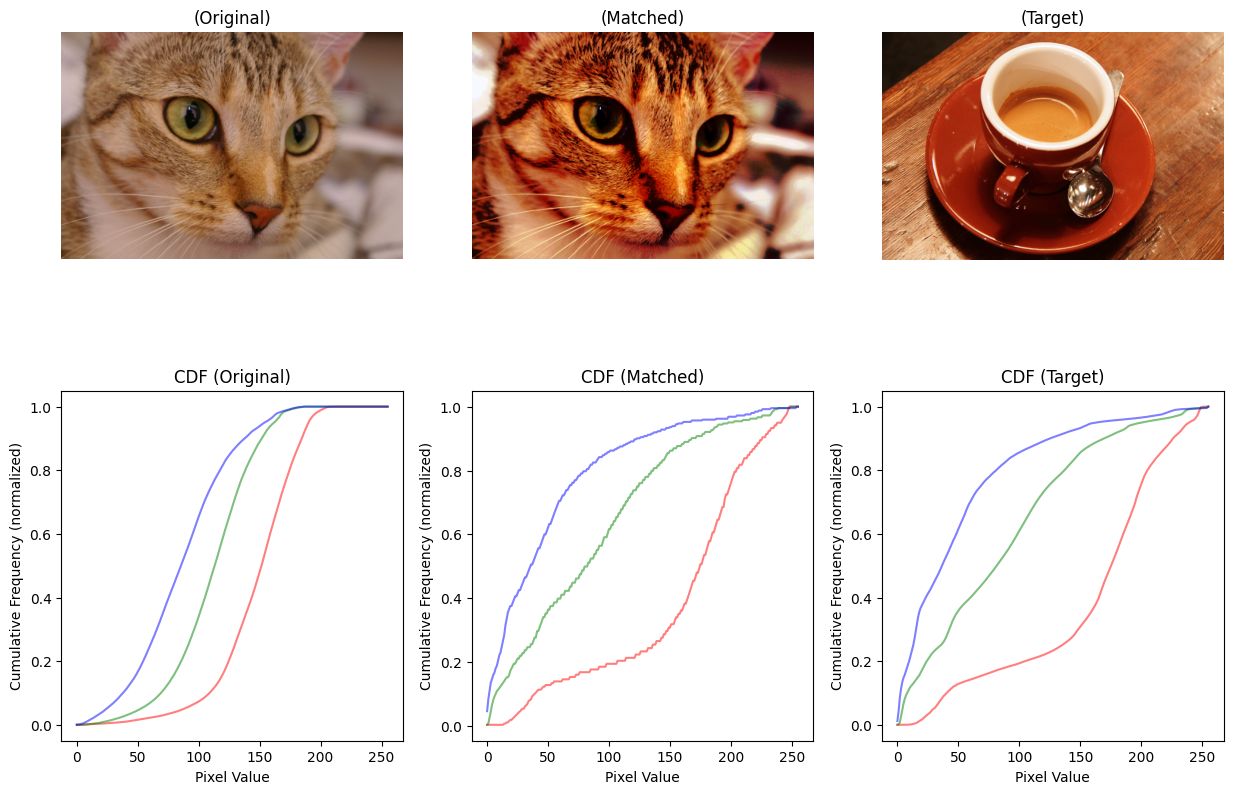

In [77]:
# Lest visualize the results with the method you defined above
img1_matched = histogram_matching(img1, img2)
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1), plt.imshow(img1), plt.axis("off"), plt.title("(Original)")
plt.subplot(2, 3, 2), plt.imshow(img1_matched), plt.axis("off"), plt.title("(Matched)")
plt.subplot(2, 3, 3), plt.imshow(img2), plt.axis("off"), plt.title("(Target)")
plt.subplot(2, 3, 4), plot_image_cfd(img1), plt.title("CDF (Original)"),
plt.subplot(2, 3, 5), plot_image_cfd(img1_matched), plt.title("CDF (Matched)")
plt.subplot(2, 3, 6), plot_image_cfd(img2), plt.title("CDF (Target)")

## Introduction to spatial filtering and image denoising

### Adding noise to clean images

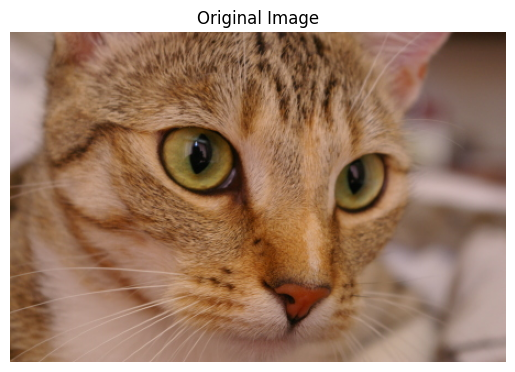

In [78]:
from skimage import data

# Let's use a test image from skimage library
img = getattr(data, "cat")()
plt.imshow(img), plt.axis("off"), plt.title("Original Image")

In [101]:
# ---------------------------------------- #
# Ex 5 (a): Using only numpy, create a function
# capable of adding Gaussian noise to an image
# define a method called
# add_gaussian_noise(image, mean, std) -> image
def add_gaussian_noise(image, mean, std):
    #TODO
# ---------------------------------------- #


# ---------------------------------------- #
# Ex 5 (b): Using only numpy, create a function
# capable of adding Salt and Pepper noise to an image
# define a method called add_salt_and_pepper_noise(image, amount)
# amount is the percentage of pixels to be affected
# add_salt_and_pepper_noise(image, amount) -> image
def add_salt_and_pepper_noise(image, amount):
    #TODO


# ---------------------------------------- #

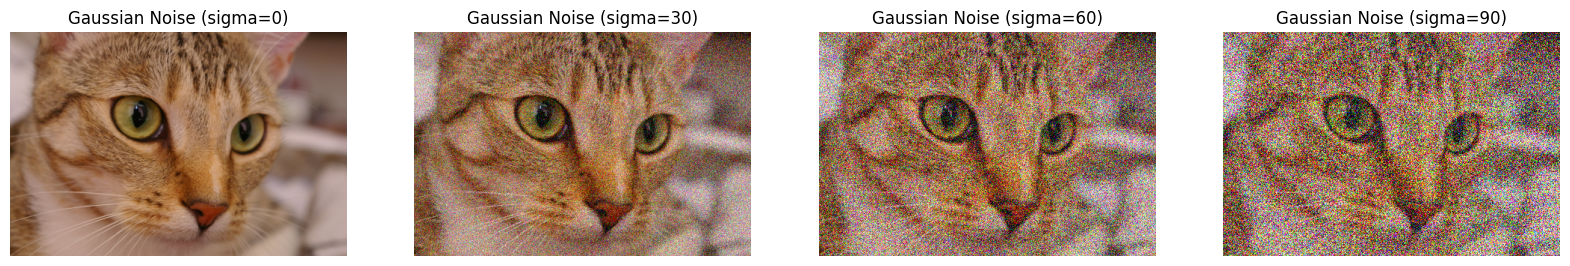

In [102]:
# Let's visualize the results for gaussian noise of different standard deviations.
plt.figure(figsize=(20, 15))
sigma = np.arange(0, 100, 30)
n = len(sigma)
for i, s in enumerate(sigma):
    plt.subplot(1, n, i + 1), plt.imshow(add_gaussian_noise(img, 0, s)), plt.axis(
        "off"
    ), plt.title(f"Gaussian Noise (sigma={s})")

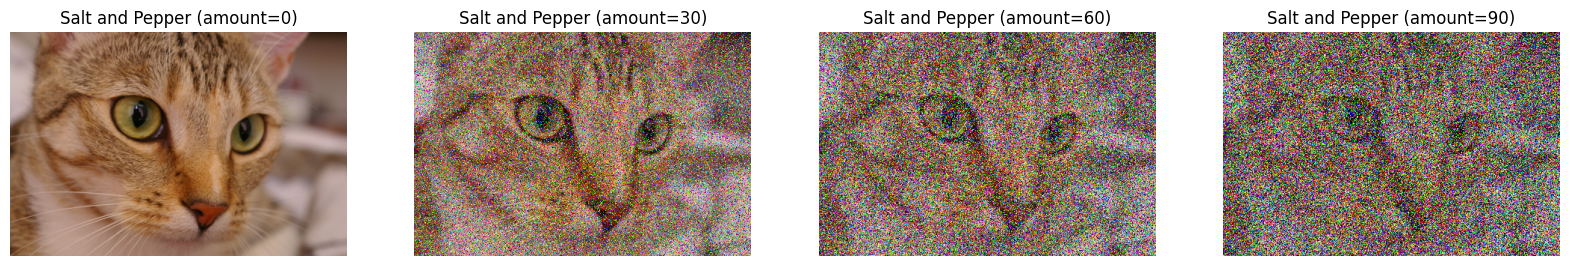

In [103]:
# Let's visualize the results for salt and pepper noise of different amounts.
plt.figure(figsize=(20, 15))
amounts = np.arange(0, 100, 30)
n = len(amounts)
for i, a in enumerate(amounts):
    plt.subplot(1, n, i + 1), plt.imshow(add_salt_and_pepper_noise(img, a)), plt.axis(
        "off"
    ), plt.title(f"Salt and Pepper (amount={a})")

### Image denoising

In [117]:
# ---------------------------------------- #
# Ex 6: Remove noise by using a Gaussian filter
# implement a method called 
# remove_noise(image, sigma) -> image
# you can use opencv (tip: cv2.GaussianBlur)
# Bonus, you can try to implement this from scratch (using numpy)
# Apply Gaussian blur to the image
def remove_noise(image, sigma):
    #TODO
# ---------------------------------------- #

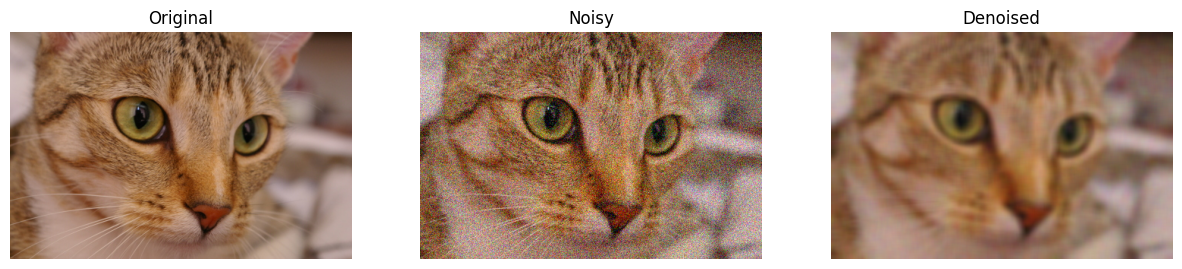

In [118]:
from skimage import data
clean_img = getattr(data, "cat")()
noisy_img = add_gaussian_noise(clean_img, 0, 30)
sigma = 10
denoised_img = remove_noise(noisy_img, sigma)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1), plt.imshow(clean_img), plt.axis("off"), plt.title("Original")
plt.subplot(1, 3, 2), plt.imshow(noisy_img), plt.axis("off"), plt.title("Noisy")
plt.subplot(1, 3, 3), plt.imshow(denoised_img), plt.axis("off"), plt.title("Denoised");

Plot the MSE for a given level of noise (fixed noise sigma) for different kernels width. 

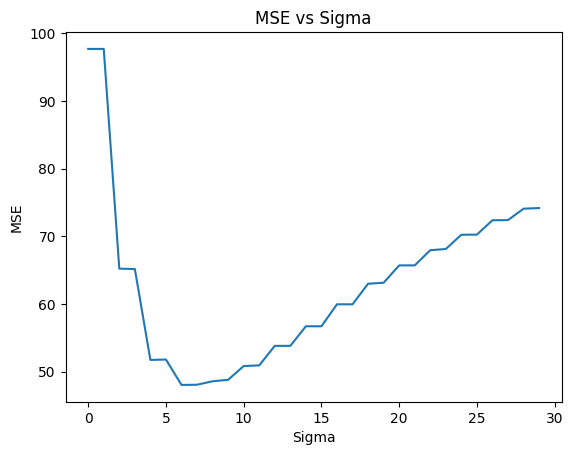

In [122]:
clean_img = getattr(data, "cat")()  # get a clean image
noisy_img = add_gaussian_noise(clean_img, 0, 30)  # compute a noise image for a fixed sigma

sigmas = np.arange(0, 30, 1)  # this is the interval of sigmas we will test for denoising

# ---------------------------------------- #
# Ex 7: Che the denoising MSE for different kernel sigmas 
def mse(image1, image2):
    #TODO
# ---------------------------------------- #
plt.plot(sigmas, mse_values), plt.xlabel("Sigma"), plt.ylabel("MSE"), plt.title("MSE vs Sigma");